In [ ]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive

Drive already mounted at /gdrive/; to attempt to forcibly remount, call drive.mount("/gdrive/", force_remount=True).
/gdrive


In [ ]:
ls

MyDrive/  Shareddrives/


In [ ]:
cd/gdrive/MyDrive/Oral Cancer/

/gdrive/MyDrive/Oral Cancer


In [ ]:
ls

 cancer/      'Oral cancer detection.h5'  'oral cancer-vggg19.h5'
 non-cancer/  'oral cancer resnet50.h5'


In [ ]:
#import libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from tensorflow.keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers import Dense, Conv2D ,Flatten,Dropout,MaxPool2D, BatchNormalization
from keras.utils import np_utils
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory  
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import VGG19
import keras
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np 
import tensorflow as tf
import pandas as pd
import seaborn
from sklearn.metrics import confusion_matrix , classification_report

In [ ]:
#import our data
train_datagen = ImageDataGenerator(
    rescale=1. / 255,rotation_range=10, fill_mode='nearest',
     featurewise_center=True,
    featurewise_std_normalization=True,
    vertical_flip= True,
    shear_range=0.2,
    zoom_range=0.2,
    brightness_range = (0.4,0.6),
    horizontal_flip=True,validation_split=0.3)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    '/gdrive/MyDrive/Oral Cancer',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',subset='training'
  )

Found 71 images belonging to 2 classes.


In [ ]:
test_generator = train_datagen.flow_from_directory(
     '/gdrive/MyDrive/Oral Cancer',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',subset='validation'
    
  )

Found 29 images belonging to 2 classes.


Found 100 files belonging to 2 classes.


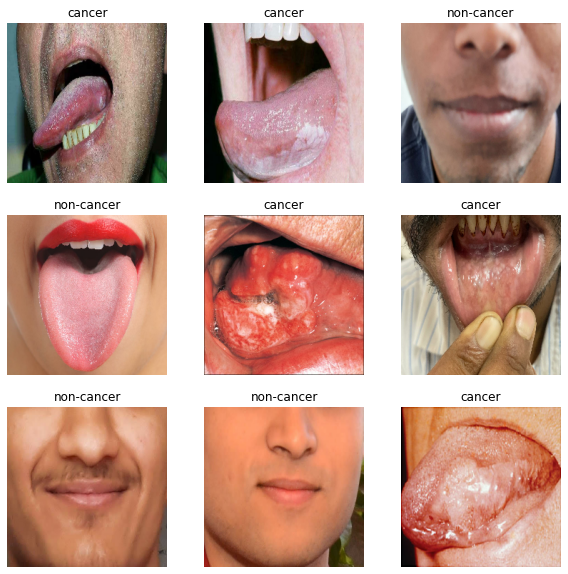

In [ ]:
train_dataset = image_dataset_from_directory('/gdrive/MyDrive/Oral Cancer/', 
                                          shuffle=True, 
                                          batch_size=32,image_size=(224,224))
class_name =  train_dataset.class_names
plt.figure(figsize = (10,10))
for image , label in train_dataset.take(1):
    for i in range(9) :
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(class_name[label[i]])
        plt.axis("off")

In [ ]:
#call vgg model
vgg_model =  VGG19(include_top=True , weights='imagenet')
for models in vgg_model.layers:
  models.trainable= False

In [ ]:
#converting from functionally model to sequential model
#removing the last 2 alyer to get rid of output layer in VGG16
vgg_model = keras.Model(inputs=vgg_model.input, outputs=vgg_model.layers[-2].output)
model = keras.Sequential()
for layer in vgg_model.layers:
  model.add(layer)

model.add(Dense(4, activation='softmax'))

In [ ]:
model.compile(optimizer="adam", loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

In [ ]:
FIT =model.fit(train_generator,
    validation_data = test_generator, 
    callbacks = [early],
    epochs = 50)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/50
1/3 [=========>....................] - ETA: 42s - loss: 1.5961 - accuracy: 0.1250

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


3/3 [==============================] - 62s 20s/step - loss: 1.1047 - accuracy: 0.4225 - val_loss: 0.6890 - val_accuracy: 0.6207
Epoch 2/50
3/3 [==============================] - 59s 27s/step - loss: 0.6984 - accuracy: 0.6197 - val_loss: 0.6889 - val_accuracy: 0.5517
Epoch 3/50
3/3 [==============================] - 59s 27s/step - loss: 0.6565 - accuracy: 0.6761 - val_loss: 0.6640 - val_accuracy: 0.6207
Epoch 4/50
3/3 [==============================] - 58s 27s/step - loss: 0.6987 - accuracy: 0.6197 - val_loss: 0.6387 - val_accuracy: 0.6207
Epoch 5/50
3/3 [==============================] - 59s 20s/step - loss: 0.6301 - accuracy: 0.6479 - val_loss: 0.6276 - val_accuracy: 0.6552
Epoch 6/50
3/3 [==============================] - 58s 27s/step - loss: 0.6059 - accuracy: 0.6197 - val_loss: 0.6332 - val_accuracy: 0.6552
Epoch 7/50
3/3 [==============================] - 59s 20s/step - loss: 0.6162 - accuracy: 0.6620 - val_loss: 0.6077 - val_accuracy: 0.6552
Epoch 8/50
3/3 [======================

In [ ]:
model.evaluate(test_generator)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


1/1 [==============================] - 17s 17s/step - loss: 0.5253 - accuracy: 0.8276


[0.5253052711486816, 0.8275862336158752]

In [ ]:
#classes names 
class_name = {0:"Cancer",1:"non cancer"}

In [ ]:
#predict test data
y = model.predict(test_generator)
y =  np.argmax(y,axis= 1 )
y 

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0])

In [ ]:
#y_true and y_pred
y_true = np.array([])
y_pred = np.array([])
i = 0
for data, labels in test_generator:
  i += 1
  y = np.argmax(model.predict(data), axis=1)
  y_true = np.append(y_true, labels)
  y_pred = np.append(y_pred, y)
  
  if i == test_generator.samples // 32 + 1:
    break

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


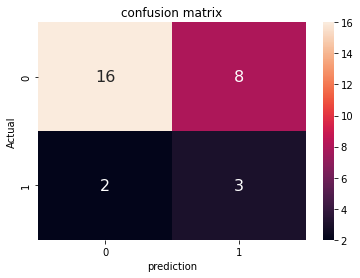

In [ ]:
cm  = confusion_matrix(y_pred,y_true)
df_cm = pd.DataFrame(cm, index = [i for i in range(2)],
                  columns = [i for i in range(2)])
seaborn .heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='d')
plt.title('confusion matrix')
plt.xlabel('prediction')
plt.ylabel('Actual');

In [ ]:
print(classification_report(y_pred, y_true))

              precision    recall  f1-score   support

         0.0       0.89      0.67      0.76        24
         1.0       0.27      0.60      0.37         5

    accuracy                           0.66        29
   macro avg       0.58      0.63      0.57        29
weighted avg       0.78      0.66      0.70        29



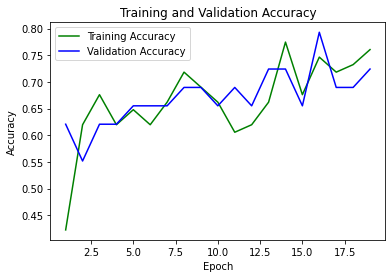

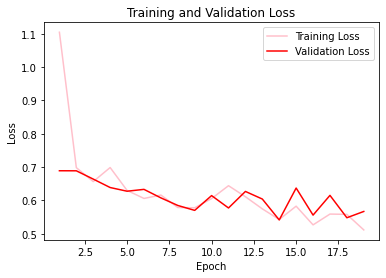

In [ ]:
#plot the result
import matplotlib.pyplot as plt
acc = FIT.history['accuracy']
val_acc = FIT.history['val_accuracy']
loss = FIT.history['loss']
val_loss = FIT.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
model.save('oral cancer-vggg19.h5')